# Chapter 4. Classification - Lab
* [4.7.1 The Stock Market Data](#4.7.1-The-Stock-Market-Data)
* [4.7.2 Logistic Regression](#4.7.2-Logistic-Regression)
* [4.7.3 Linear Discriminant Analysis](#4.7.3-Linear-Discriminant-Analysis)
* [4.7.4 Quadratic Discriminant Analysis](#4.7.4-Quadratic-Discriminant-Analysis)
* [4.7.5 Naive Bayes](#4.7.5-Naive-Bayes)

## 4.7.1 The Stock Market Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sm_df = pd.read_csv('../data/smarket.csv', index_col=0, dtype={'Direction': 'category'})

In [3]:
sm_df.head(20)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
7,2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
8,2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
9,2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
10,2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


In [4]:
sm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 89.2 KB


In [5]:
sm_df.describe().applymap('{:.2f}'.format)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.00,1250.00,1250.00,1250.00,1250.00,1250.00,1250.00,1250.00
mean,2003.02,0.00,0.00,0.00,0.00,0.01,1.48,0.00
std,1.41,1.14,1.14,1.14,1.14,1.15,0.36,1.14
min,2001.00,-4.92,-4.92,-4.92,-4.92,-4.92,0.36,-4.92
25%,2002.00,-0.64,-0.64,-0.64,-0.64,-0.64,1.26,-0.64
50%,2003.00,0.04,0.04,0.04,0.04,0.04,1.42,0.04
75%,2004.00,0.60,0.60,0.60,0.60,0.60,1.64,0.60
max,2005.00,5.73,5.73,5.73,5.73,5.73,3.15,5.73


In [6]:
sm_df.nunique()[['Year', 'Direction']]

Year         5
Direction    2
dtype: int64

In [7]:
cols=sm_df.columns
cols

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

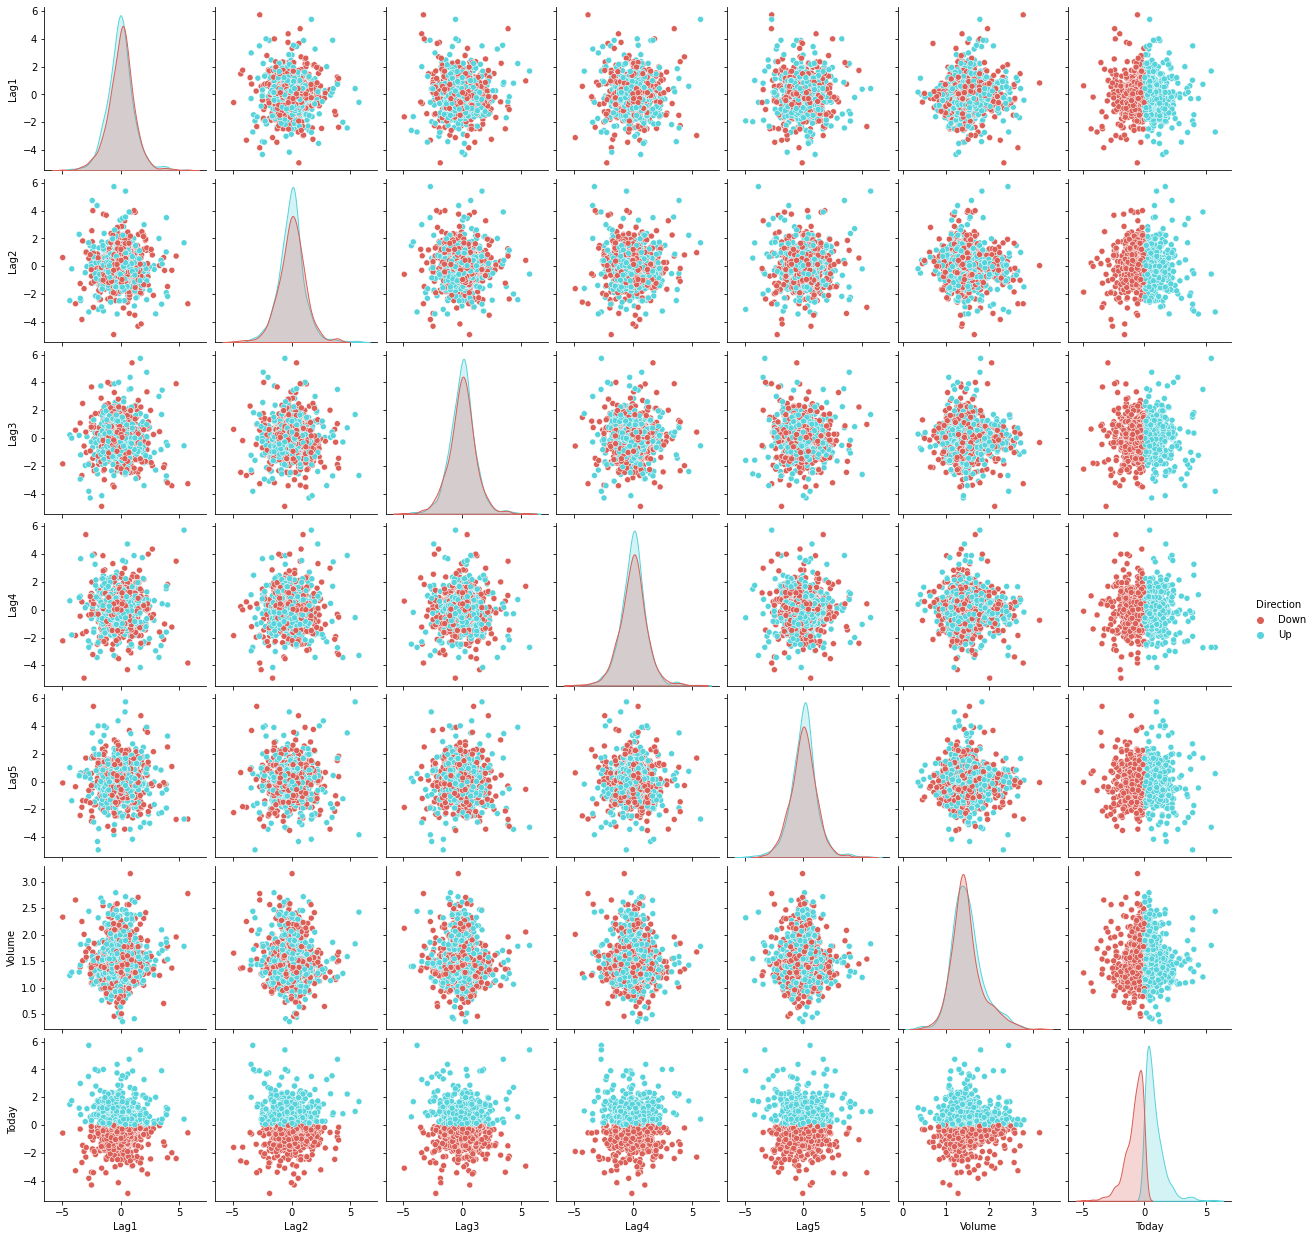

In [8]:
sb.pairplot(data=sm_df, palette='hls', hue='Direction', x_vars=cols[1:-1], y_vars=cols[1:-1]);

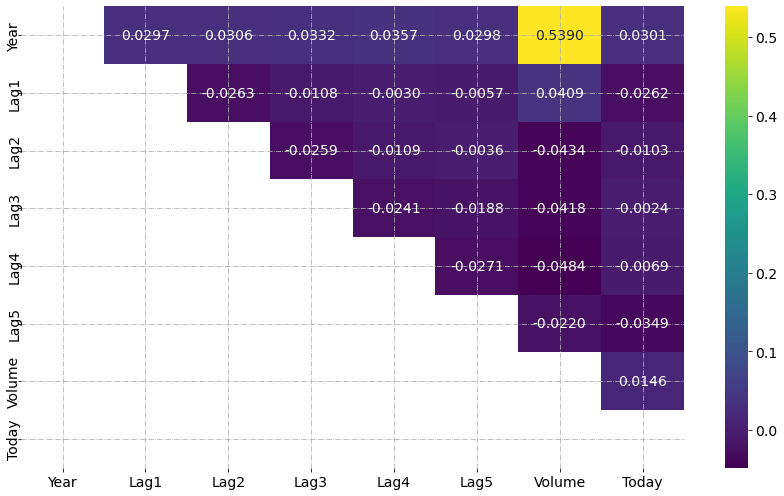

In [9]:
fig, axes = plt.subplots(figsize=(12, 7))
mask = np.zeros_like(sm_df.corr())
mask[np.tril_indices_from(mask)] = 1
hm = sb.heatmap(data=sm_df.corr(), cmap='viridis',
                annot=True, fmt='1.4f', mask=mask,
                annot_kws={'size':14}, ax=axes)
axes.tick_params(labelsize=14)
cbar = hm.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
plt.setp(axes.get_yticklabels(), ha='center',
         rotation_mode='anchor')
fig.tight_layout()
plt.grid(True, linestyle='-.');

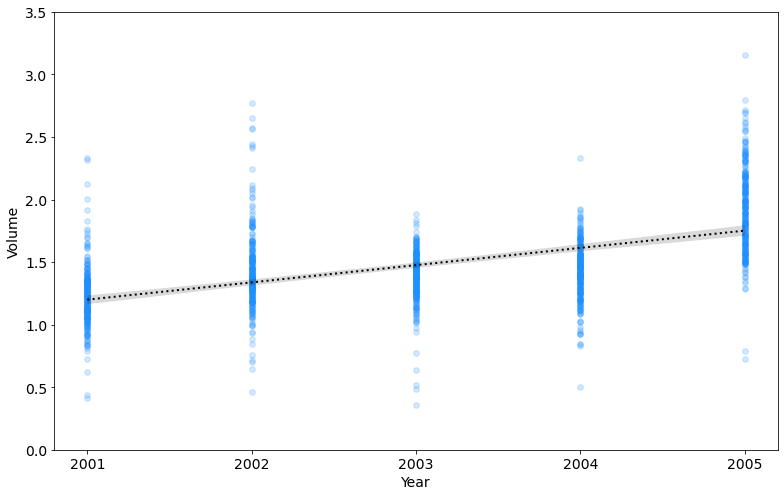

In [10]:
fig, axes = plt.subplots(figsize=(11, 7))
sb.regplot(x='Year', y='Volume', scatter_kws={'color': 'dodgerblue', 's': 32, 'alpha': 0.2},
           order=1, line_kws={'lw': 2, 'ls': ':', 'color': 'k'}, ci=99, data=sm_df, ax=axes)
axes.set_xticks(range(2001, 2006))
axes.set_xticklabels(range(2001, 2006), fontsize=14)
axes.set_yticks(np.arange(0, 4, 0.5))
axes.set_yticklabels(np.arange(0, 4, 0.5), fontsize=14)
axes.set_xlabel('Year', fontsize=14)
axes.set_ylabel('Volume', fontsize=14)
fig.tight_layout();

## 4.7.2 Logistic Regression

In [11]:
l = ['Up', 'Down']
formula = '''C(Direction, levels=l) ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'''

In [12]:
results = smf.glm(formula=formula, family=sm.families.Binomial(), data=sm_df).fit()
print(results.summary())

                                       Generalized Linear Model Regression Results                                        
Dep. Variable:     ['C(Direction, levels=l)[Up]', 'C(Direction, levels=l)[Down]']   No. Observations:                 1250
Model:                                                                        GLM   Df Residuals:                     1243
Model Family:                                                            Binomial   Df Model:                            6
Link Function:                                                              Logit   Scale:                          1.0000
Method:                                                                      IRLS   Log-Likelihood:                -863.79
Date:                                                            Wed, 15 Jun 2022   Deviance:                       1727.6
Time:                                                                    17:20:46   Pearson chi2:                 1.25e+03
No. Iterations: 

Similar results as above for the parameters can be obtained using Scikit-Learn, making sure that the _Up_ category is converted to _1_ and _Down_ to _0_.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score

In [14]:
X = sm_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = (sm_df['Direction'] == 'Up').astype('int')

In [15]:
lr = LogisticRegression()
lr.fit(X, y)
lr_res = pd.concat([pd.DataFrame(lr.intercept_), pd.DataFrame(lr.coef_)], axis=1).T.reset_index(drop=True)
lr_res.rename(index = {0: 'Intercept', 1: 'Lag1', 2: 'Lag2', 3: 'Lag3', 4: 'Lag4', 5: 'Lag5', 6: 'Volume'}, columns = {0: 'coef'}, inplace=True)

In [16]:
lr_res

,coef
Intercept,-0.121085
Lag1,-0.072843
Lag2,-0.042235
Lag3,0.011016
Lag4,0.009284
Lag5,0.010264
Volume,0.132112


Let's calculate the _confusion matrix_ using Scikit-Learn. The `predict_proba` method returns the probabilities of each outcome, as ordined by the `self.classes_` attribute, which is _0 = Down_ and _Up = 1_. We only need the _Up_ class.

In [17]:
ypred = (lr.predict_proba(X)[:,1] > 0.5).astype('int')
confusion_matrix(ypred, y)

array([[144, 141],
       [458, 507]])

The accuracy can be calculated from the `lr.score()` method or simply from `(ypred == y).mean()`.

In [18]:
print(f'Accuracy from average: {(ypred == y).mean()}')

Accuracy from average: 0.5208


In [19]:
print(f'Accuracy from Scikit-Learn: {lr.score(X, y)}')

Accuracy from Scikit-Learn: 0.5208


In [20]:
print(f'F1 score from Scikit-Learn: {round(f1_score(ypred, y), 4)}')

F1 score from Scikit-Learn: 0.6286


## 4.7.3 Linear Discriminant Analysis

In [21]:
ld = LinearDiscriminantAnalysis()
ld.fit(X, y)
ld_res = pd.concat([pd.DataFrame(lr.intercept_), pd.DataFrame(lr.coef_)], axis=1).T.reset_index(drop=True)
ld_res.rename(index = {0: 'Intercept', 1: 'Lag1', 2: 'Lag2', 3: 'Lag3', 4: 'Lag4', 5: 'Lag5', 6: 'Volume'}, columns = {0: 'coef'}, inplace=True)

In [22]:
ld_res

,coef
Intercept,-0.121085
Lag1,-0.072843
Lag2,-0.042235
Lag3,0.011016
Lag4,0.009284
Lag5,0.010264
Volume,0.132112


In [23]:
ypred = (ld.predict_proba(X)[:,1] > 0.5).astype('int')
confusion_matrix(ypred, y)

array([[145, 141],
       [457, 507]])

In [24]:
print(f'Accuracy from Scikit-Learn: {ld.score(X, y)}')

Accuracy from Scikit-Learn: 0.5216


In [25]:
print(f'F1 score from Scikit-Learn: {round(f1_score(ypred, y), 4)}')

F1 score from Scikit-Learn: 0.629


## 4.7.4 Quadratic Discriminant Analysis

In [26]:
qd = QuadraticDiscriminantAnalysis()
qd.fit(X, y)
qd_res = pd.concat([pd.DataFrame(lr.intercept_), pd.DataFrame(lr.coef_)], axis=1).T.reset_index(drop=True)
qd_res.rename(index = {0: 'Intercept', 1: 'Lag1', 2: 'Lag2', 3: 'Lag3', 4: 'Lag4', 5: 'Lag5', 6: 'Volume'}, columns = {0: 'coef'}, inplace=True)

In [27]:
qd_res

,coef
Intercept,-0.121085
Lag1,-0.072843
Lag2,-0.042235
Lag3,0.011016
Lag4,0.009284
Lag5,0.010264
Volume,0.132112


In [28]:
ypred = (qd.predict_proba(X)[:,1] > 0.5).astype('int')
confusion_matrix(ypred, y)

array([[181, 136],
       [421, 512]])

In [29]:
print(f'Accuracy from Scikit-Learn: {qd.score(X, y)}')

Accuracy from Scikit-Learn: 0.5544


In [30]:
print(f'F1 score from Scikit-Learn: {round(f1_score(ypred, y), 4)}')

F1 score from Scikit-Learn: 0.6477


## 4.7.5 Naive Bayes

In [31]:
nb = GaussianNB()
nb.fit(X, y)
nb_res = pd.concat([pd.DataFrame(lr.intercept_), pd.DataFrame(lr.coef_)], axis=1).T.reset_index(drop=True)
nb_res.rename(index = {0: 'Intercept', 1: 'Lag1', 2: 'Lag2', 3: 'Lag3', 4: 'Lag4', 5: 'Lag5', 6: 'Volume'}, columns = {0: 'coef'}, inplace=True)

In [32]:
nb_res

,coef
Intercept,-0.121085
Lag1,-0.072843
Lag2,-0.042235
Lag3,0.011016
Lag4,0.009284
Lag5,0.010264
Volume,0.132112


In [33]:
ypred = (nb.predict_proba(X)[:,1] > 0.5).astype('int')
confusion_matrix(ypred, y)

array([[148, 114],
       [454, 534]])

In [34]:
print(f'Accuracy from Scikit-Learn: {nb.score(X, y)}')

Accuracy from Scikit-Learn: 0.5456


In [35]:
print(f'F1 score from Scikit-Learn: {round(f1_score(ypred, y), 4)}')

F1 score from Scikit-Learn: 0.6528
